# <font color="Brown">Blood Donation Prediction Model </font>
Made By Ethan Thomas D'Mello, Mohammad Ovesh Ansari, Jagadish Patil and Abdul Careem

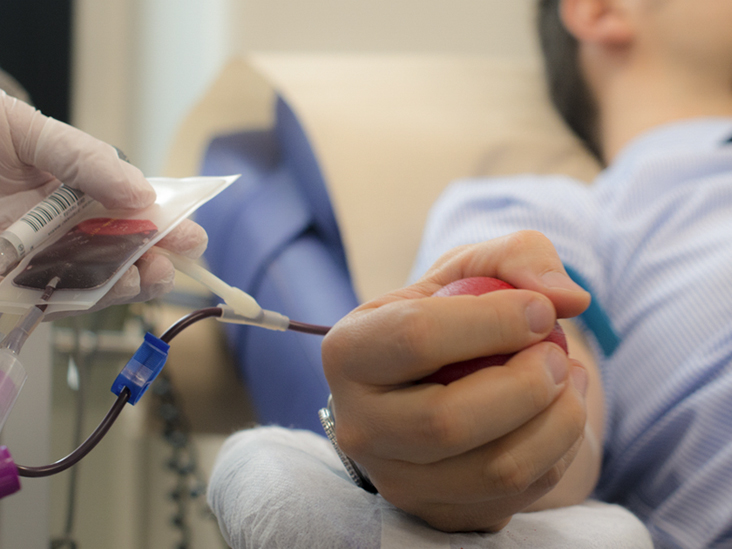

# Predicting if a person will donate blood using Machine Learning.
 This notebook details various python-based ML and data science libraries in an attempt to build a model which will be able to confidently predict if a person will donate within a period of time.

The following pipeline will be followed :
- Problem Definition
- Data 
- Evaluvation 
- Features 
- Modelling 
- Experimentation

### Problem Definition
In a statement,
> With the following Parameters, can we efficiently predict if a possible donator will donate their blood ?

### Data
The Data provided by Datamites:

https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1011-BloodDonaPred.zip

Using both Training and Testing Data.



### Evaluvation
> If we can predict the target variable ( whether if the person will donate or not ) with an accuracy of 95% , we will persue the project.


### Features
Various features will be identified and detailed 

#### Create data dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.


1. **Unnamed**: No name is given but it represents a unique 'int' value corresponding to the donors ID.
2. **Months since Last Donation**: this is the number of monthis since this donor's most recent donation.
3. **Number of Donations**: this is the total number of donations that the donor has made.
4. **Total Volume Donated**: this is the total amound of blood that the donor has donated in cubuc centimeters.
5. **Months since First Donation**: this is the number of months since the donor's first donation.

## <font color="brown">Preparing the tools <font>
we're going to use several libraries to aid our model, some of them are listed below:


In [86]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [87]:
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### <font color='brown'>Data Exploration<font>
The goal here is to find more about data and become a subject matter export on the dataset you're working with.

- What question(s) are you going to solve?
- What kind of data do we have ans how do we treat different types?
- What's missing from the data and how do you deal with it? 
- Where are the outliers and why should you care about them?   
- How can you add, change or remove features to get more out of you data?
    

In [88]:
#checking first five rows
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [89]:
#checking last five rows
df.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [90]:
df['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

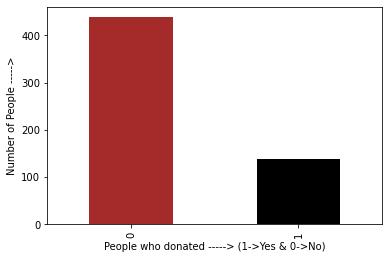

In [91]:
#analysing the number of people who donated
df['Made Donation in March 2007'].value_counts().plot( kind='bar', color=['brown','black']);
plt.xlabel('People who donated -----> (1->Yes & 0->No)');
plt.ylabel('Number of People ----->');

In [92]:
#checking the info and describe functions 
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [93]:
# Are there any missing values?
df.isna().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

### Renaming the data and dropping unwanted columns

In [94]:
df.rename(columns={'Months since Last Donation': 'msld',
                   'Number of Donations':'nod' ,
                   'Total Volume Donated (c.c.)':'tvd',
                   'Months since First Donation':'msfd',
                   'Made Donation in March 2007':'target'}, inplace = True )
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [95]:
df.head()

,msld,nod,tvd,msfd,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## <font color=brown> Data Visualizations <font>
We will check the heatmap for the types of correlation.
There are two types of correlation :
- Positive Correlation.
- Negative Correlation.

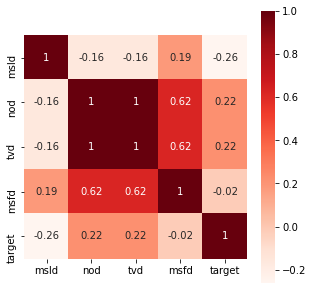

In [96]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True  ) 
plt.show()

# The positve correlation:
- Month since last donated:   Month since first donated
- Number of Donations:   Month since first donated ,   Made donation in March 2007
- Total Volume Donated:   Month since first donated ,   Made donation in March 2007
- Month since first donated:    Number of Donations ,   Total Volume Donated

# The Negative correlation:
- Month since last donated:   Number of Donations,   Total Volume Donated ,   Made donation in March 2007
- Number of Donations:   Month since last donated
- Total Volume Donated:     Month since last donated
- Month since first donated: Made donation in March 2007

### Analysing Months since last donation with respect to Months since first donation.
We will compare the two data to check if it is a deciding variable in the prediction.

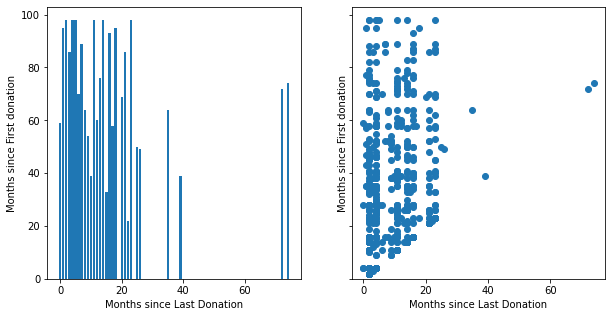

In [142]:
fig, axs = plt.subplots(1,2,figsize=(10,5),sharey = True)

#first plot
axs[0].bar(df.msld, df.msfd)

axs[0].set_xlabel('Months since Last Donation')
axs[0].set_ylabel('Months since First donation')

#second plot
axs[1].scatter(df.msld, df.msfd)

axs[1].set_xlabel('Months since Last Donation')
axs[1].set_ylabel('Months since First donation')
plt.show()

### Analysing Number of donations and Total volume donated with respect to Month since first donated and Donation in March 2007

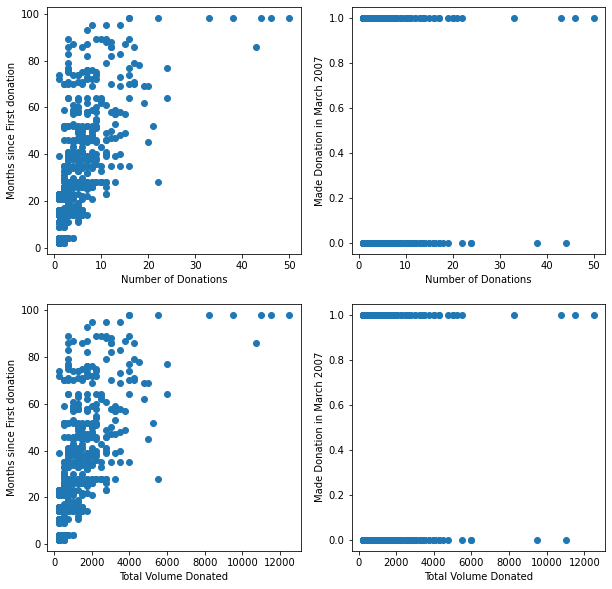

In [164]:
fig , axs = plt.subplots(2,2, figsize=(10,10))

#subplot 1
axs[0][0].scatter(df.nod,df.msfd)
axs[0][1].scatter(df.nod,df.target)


for i in range(0,2) :
    axs[0][i].set_xlabel('Number of Donations')

axs[0][0].set_ylabel('Months since First donation')
axs[0][1].set_ylabel('Made Donation in March 2007')

#subplot 2
axs[1][0].scatter(df.tvd,df.msfd)
axs[1][1].scatter(df.tvd,df.target)


for i in range(0,2) :
    axs[1][i].set_xlabel('Total Volume Donated')

axs[1][0].set_ylabel('Months since First donation')
axs[1][1].set_ylabel('Made Donation in March 2007')

plt.show()